<a href="https://colab.research.google.com/github/aliyusifov99/ml_course_utp/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


# Investigating the data

In [4]:
df = pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [11]:
df.corr()['quality']

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

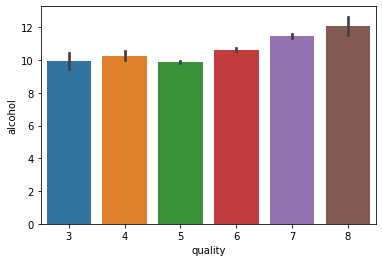

In [19]:
sns.barplot(data=df, y='alcohol', x='quality')

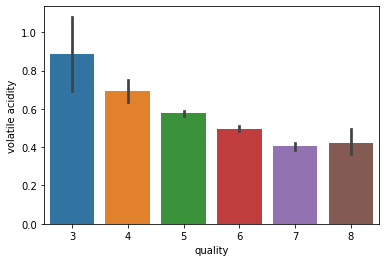

In [20]:
sns.barplot(data=df, y='volatile acidity', x='quality')

# Making the model

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [23]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [26]:
x = df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar','chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density','pH', 'sulphates', 'alcohol']]
y = df['quality']

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x,y)

x_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
958,6.4,0.570,0.12,2.3,0.120,25.0,36.0,0.99519,3.47,0.71,11.3
1215,8.8,0.270,0.46,2.1,0.095,20.0,29.0,0.99488,3.26,0.56,11.3
732,7.3,0.835,0.03,2.1,0.092,10.0,19.0,0.99660,3.39,0.47,9.6
1032,8.1,0.820,0.00,4.1,0.095,5.0,14.0,0.99854,3.36,0.53,9.6
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8


In [28]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)

In [29]:
print(f'R-score is {regressor.score(x_test, y_test)}')

R-score is 0.40222621616873877


# Making improvements to the model: Scaling

In [31]:
from sklearn.preprocessing import StandardScaler 

In [32]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [37]:
x_train

array([[-1.10464015,  0.21934918, -0.7855616 , ...,  1.03274634,
         0.26968729,  0.81264463],
       [ 0.25611006, -1.42765843,  0.95120309, ..., -0.31710416,
        -0.57370097,  0.81264463],
       [-0.59435882,  1.6742059 , -1.24529343, ...,  0.51851758,
        -1.07973393, -0.77596189],
       ...,
       [ 0.82308932, -0.1649526 ,  1.10444703, ...,  0.00428881,
         0.71949436,  0.25195997],
       [-1.55822355,  0.49385045, -1.24529343, ...,  2.25403965,
        -0.23634567, -0.30872468],
       [-0.59435882,  0.10954867, -1.34745606, ...,  0.2614032 ,
        -0.4612492 ,  0.5323023 ]])

In [38]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)

In [39]:
print(f'R-score is {regressor.score(x_test, y_test)}')


R-score is 0.40222621616873944


In [40]:
from sklearn.ensemble import RandomForestRegressor

In [42]:
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

In [43]:
rf.score(x_test, y_test)

0.5138998538011695

In [47]:
x_test

array([[ 8.79787242e-01, -9.88456400e-01,  6.95796520e-01, ...,
        -6.38497140e-01, -9.11056277e-01, -8.69409335e-01],
       [ 2.46732916e+00,  3.84049939e-01,  1.92174807e+00, ...,
        -1.79551186e+00, -5.17475089e-01, -4.95619566e-01],
       [ 4.82901764e-01, -2.51836025e-04, -1.72585825e-01, ...,
        -6.38497140e-01, -5.17475089e-01, -8.69409335e-01],
       ...,
       [ 2.93183601e-02,  4.93850446e-01, -7.85561598e-01, ...,
         4.54238982e-01,  1.28175320e+00,  1.27988184e+00],
       [ 2.56110062e-01,  2.33300894e+00, -1.14313080e+00, ...,
        -5.99897817e-02, -1.24841158e+00, -7.75961893e-01],
       [-1.10464015e+00,  1.83890666e+00, -1.24529343e+00, ...,
         1.93264668e+00, -9.67282161e-01,  2.12090882e+00]])

In [48]:
from sklearn.linear_model import SGDRegressor

In [50]:
regressor = SGDRegressor(loss='squared_loss')
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)

regressor.score(x_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,


0.39814569748518114

In [55]:
x = df[['fixed acidity', 'volatile acidity', 'citric acid','chlorides', 'total sulfur dioxide', 'density', 'sulphates', 'alcohol']]
y = df['quality']

In [56]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
print(f'R-score is {regressor.score(x_test, y_test)}')

R-score is 0.40222621616873944


In [57]:
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
print(f'R-score is {rf.score(x_test, y_test)}')


R-score is 0.5088251299545159
